In [192]:
from data_loader import load_data
from naive_bayes import BernoulliNaiveBayes
from nlp_processing import LemmaCountVectorizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import time
import pandas as pd
from scipy.stats import randint, norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import re
# # taken from https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
# REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
# REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

# def preprocess_reviews(reviews):
#     reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
#     reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
#     return "".join(reviews)

# Load Data

In [272]:
# read data
train, test = load_data()
# full_text = list(train.iloc[:, 1].values) + list(test.iloc[:, 1].values)
# raw training and test data
X_train = train.iloc[:,1].values
X_test = test.iloc[:,1].values
y = train.iloc[:,2].values.astype(int)

"Train(X-%s, y-%s), Test(X-%s)"%(X_train.shape, y.shape, X_test.shape)

'Train(X-(25000,), y-(25000,)), Test(X-(25000,))'

# Data Exploration
Are most ocurrent words important?

In [225]:
vect = LemmaCountVectorizer(strip_accents='unicode', stop_words=None, 
                                stem=True, ngram_range=(1, 1))
data = vect.fit_transform(X_train)
counts = np.ravel(data.sum(axis=0))
idx_sort = np.argsort(counts)
words = vect.get_feature_names()
top = 10
["{}:{}".format(w,c) for c,w in zip(counts[idx_sort][-top:], words[-top:])]

['zzzz:73286',
 'zzzzz:75997',
 'zzzzzzzz:93976',
 'zzzzzzzzzzzz:96467',
 'zzzzzzzzzzzzz:101871',
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz:107331',
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz:135724',
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz:145864',
 'æsthetic:164141',
 'østbye:336748']

In [226]:
idx = np.argwhere(counts==3)
["{}:{}".format(w,c) for c,w in zip(counts[idx], np.array(words)[idx])]

["['001']:[3]",
 "['10pm']:[3]",
 "['10x']:[3]",
 "['123']:[3]",
 "['125']:[3]",
 "['128']:[3]",
 "['12a']:[3]",
 "['131']:[3]",
 "['134']:[3]",
 "['136']:[3]",
 "['147']:[3]",
 "['1500']:[3]",
 "['15s']:[3]",
 "['1780s']:[3]",
 "['1798']:[3]",
 "['1820']:[3]",
 "['1824']:[3]",
 "['183']:[3]",
 "['1836']:[3]",
 "['1837']:[3]",
 "['1839']:[3]",
 "['1846']:[3]",
 "['1847']:[3]",
 "['1850']:[3]",
 "['1850s']:[3]",
 "['1853']:[3]",
 "['1863']:[3]",
 "['1865']:[3]",
 "['1881']:[3]",
 "['1888']:[3]",
 "['1892']:[3]",
 "['18a']:[3]",
 "['1903']:[3]",
 "['1911']:[3]",
 "['1h']:[3]",
 "['2012']:[3]",
 "['2200']:[3]",
 "['232']:[3]",
 "['24th']:[3]",
 "['2600']:[3]",
 "['26th']:[3]",
 "['270']:[3]",
 "['275']:[3]",
 "['27th']:[3]",
 "['28th']:[3]",
 "['2hrs']:[3]",
 "['30min']:[3]",
 "['30pm']:[3]",
 "['38th']:[3]",
 "['3p']:[3]",
 "['3rds']:[3]",
 "['451']:[3]",
 "['47s']:[3]",
 "['49th']:[3]",
 "['571']:[3]",
 "['6000']:[3]",
 "['607']:[3]",
 "['70mm']:[3]",
 "['70th']:[3]",
 "['90mins']:[3]",

features 74638 mean 76.08121868217262 median 3.0
features 1201 mean 1071.6511240632806 median 783.0


Text(0.5, 1.0, 'Frequency of filtered words. (bottom=400,top=4000)')

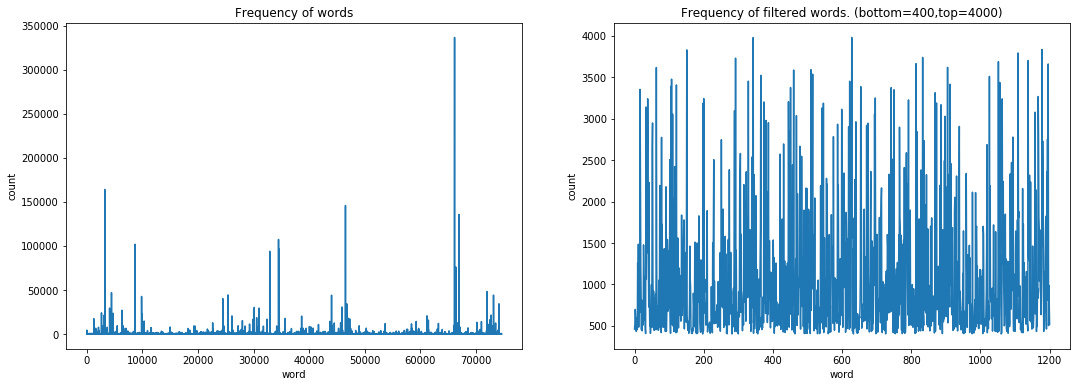

In [263]:
plt.figure(figsize=(18,6))
# figure 1
plt.subplot(1, 2, 1)
plt.plot(counts)
plt.xlabel("word")
plt.ylabel("count")
plt.title("Frequency of words")
print("features", len(counts), "mean", counts.mean(), "median", np.median(counts))

# figure 2
plt.subplot(1, 2, 2)
top = 4000
bottom = 400
counts_filtered_top = counts[counts<top]
counts_filtered = counts_filtered_top[counts_filtered_top>bottom]
print("features", len(counts_filtered), "mean", counts_filtered.mean(), "median", np.median(counts_filtered))
plt.plot(counts_filtered)
plt.xlabel("word")
plt.ylabel("count")
plt.title("Frequency of filtered words. (bottom={},top={})".format(bottom, top))

# possible values for min 3, 50, 100, 400
# possible values for max 400, 4000, 40000

{'whiskers': [<matplotlib.lines.Line2D at 0x1a26256c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1a26247320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a26256b00>,
 'medians': [<matplotlib.lines.Line2D at 0x1a262479b0>,
 'fliers': [],
 'means': []}

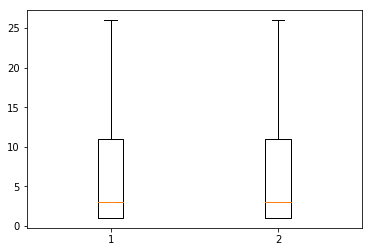

In [264]:
data = [counts, counts_filtered_top]
plt.boxplot(data, showfliers=False)

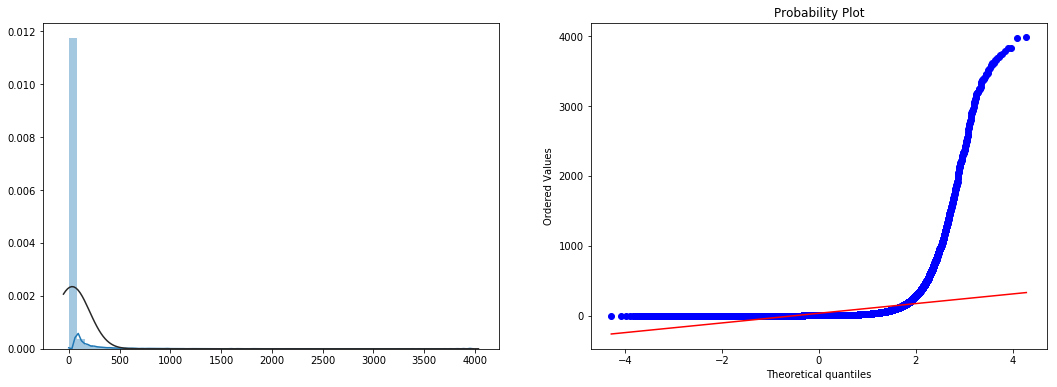

In [268]:
plt.figure(figsize=(18,6))  # follows a normal distribution? 
plt.subplot(1,2,1)

sns.distplot(counts_filtered_top, fit=norm) 
plt.subplot(1,2,2)
res = stats.probplot(counts_filtered_top, plot=plt)

# Feature Engineering

In [3]:
score = 'f1'

## Logistic Regression

Feature engineering considering TF-IDF

In [307]:
parameters_regression_tfidf = {
    'vec__min_df': [3, 50, 100, 400, 1],
    'vec__max_df': [4000, 40000, 1.0],
    'vec__stem': [True, False],
    'vec__ngram_range':[(1, 1), (1, 2), (2, 2)],
    'tfidf__norm': ['l1', 'l2'],
    'tfidf__smooth_idf': [True, False],
    'clf__fit_intercept': [True, False], 
    'clf__C': [.5, 1, 2, 2.5, 3], 
}

pipeline_regression_tfidf = Pipeline([
    ('vec', LemmaCountVectorizer(strip_accents='unicode', stop_words=None, binary=False)),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(solver='saga', penalty='l2'))
])
                  
rs_regression_tfidf = RandomizedSearchCV(pipeline_regression_tfidf, parameters_regression_tfidf, 
                                   cv=10, scoring=score, n_jobs=-1, verbose=0, random_state=62, n_iter=20, 
                                         return_train_score=True)
start = time.time()
rs_regression_tfidf.fit(X_train, y)
time.time() - start, rs_regression_tfidf.best_params_, rs_regression_tfidf.best_score_

(1176.392740726471,
 {'vec__stem': False,
  'vec__ngram_range': (1, 2),
  'vec__min_df': 100,
  'vec__max_df': 4000,
  'tfidf__smooth_idf': False,
  'tfidf__norm': 'l2',
  'clf__fit_intercept': False,
  'clf__C': 2.5},
 0.8953022668864954)

In [308]:
pd.options.display.max_columns = None
pd.DataFrame(rs_regression_tfidf.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vec__stem,param_vec__ngram_range,param_vec__min_df,param_vec__max_df,param_tfidf__smooth_idf,param_tfidf__norm,param_clf__fit_intercept,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
14,34.001173,0.347224,2.256553,0.041265,False,"(1, 2)",100,4000,False,l2,False,2.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.901186,0.906613,0.895817,0.892320,0.894548,0.885635,0.883117,0.903251,0.891892,0.898643,0.895302,0.007072,1,0.948263,0.949046,0.948518,0.948519,0.948216,0.948183,0.949060,0.947243,0.948262,0.948207,0.948352,0.000485
8,33.525362,0.398965,2.126110,0.059528,True,"(2, 2)",3,1,True,l2,True,2.5,"{'vec__stem': True, 'vec__ngram_range': (2, 2)...",0.889770,0.896989,0.883412,0.889415,0.886156,0.890563,0.880345,0.891710,0.888713,0.894737,0.889181,0.004704,2,0.988579,0.989285,0.988321,0.988706,0.988219,0.989070,0.989072,0.988301,0.988888,0.987948,0.988639,0.000416
1,13.347431,0.297260,1.312915,0.020497,True,"(1, 1)",50,40000,True,l2,True,3,"{'vec__stem': True, 'vec__ngram_range': (1, 1)...",0.898930,0.894127,0.890909,0.888449,0.887555,0.884144,0.876333,0.886680,0.882797,0.892928,0.888285,0.006076,3,0.934524,0.933946,0.935421,0.935562,0.934052,0.935190,0.934732,0.935233,0.934743,0.934113,0.934752,0.000559
13,12.752568,0.099664,1.220150,0.030827,False,"(1, 1)",50,40000,False,l2,True,3,"{'vec__stem': False, 'vec__ngram_range': (1, 1...",0.898930,0.894042,0.890205,0.888801,0.887645,0.883353,0.877026,0.886680,0.882797,0.893012,0.888249,0.005974,4,0.934394,0.934399,0.935274,0.935267,0.934046,0.935267,0.934826,0.935079,0.935103,0.934095,0.934775,0.000471
15,34.676632,0.328301,2.292908,0.060326,False,"(1, 2)",100,1,False,l2,False,0.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.892758,0.896026,0.879086,0.885805,0.887828,0.878416,0.872399,0.888536,0.883241,0.881543,0.884564,0.006732,5,0.909443,0.907971,0.909866,0.909635,0.909555,0.910429,0.909019,0.907810,0.909788,0.908067,0.909158,0.000861
18,35.884086,0.280849,2.354714,0.066755,True,"(1, 2)",400,40000,True,l2,False,1,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.875049,0.882283,0.864780,0.872340,0.871959,0.863492,0.860520,0.873161,0.868390,0.872584,0.870456,0.006019,6,0.888497,0.888184,0.891045,0.888987,0.888487,0.890123,0.890104,0.887723,0.889859,0.889222,0.889223,0.000988
4,33.438664,0.239512,2.228788,0.062472,False,"(1, 2)",50,4000,False,l1,False,3,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.873072,0.875693,0.868072,0.868599,0.873317,0.866878,0.857592,0.879365,0.871146,0.868944,0.870268,0.005583,7,0.885394,0.884994,0.885767,0.886080,0.885455,0.884855,0.885861,0.883866,0.884769,0.884162,0.885120,0.000691
3,39.353863,0.519734,2.546016,0.075919,False,"(1, 2)",3,4000,True,l1,True,2.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.872629,0.874660,0.864452,0.868421,0.876596,0.862822,0.854839,0.876702,0.870869,0.868145,0.869013,0.006528,8,0.892297,0.893846,0.893443,0.893723,0.893114,0.893915,0.893051,0.891529,0.890405,0.892837,0.892816,0.001066
12,27.558163,0.123206,1.684262,0.075913,False,"(2, 2)",50,1,False,l2,False,2,"{'vec__stem': False, 'vec__ngram_range': (2, 2...",0.867460,0.873453,0.859144,0.860649,0.860567,0.867894,0.861961,0.876898,0.859635,0.869148,0.865681,0.005924,9,0.938434,0.936569,0.937459,0.937939,0.937975,0.936563,0.937149,0.937276,0.938098,0.937840,0.937530,0.000606
16,34.963263,0.295805,2.379652,0.093930,True,"(1, 2)",400,4000,True,l2,False,1,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.870588,0.872121,0.865392,0.869874,0.869877,0.857820,0.8468

Feature engineering BoW

In [309]:
parameters_regression_bow = {
    'vec__min_df': [3, 50, 100, 400, 1],
    'vec__max_df': [400, 4000, 40000, 1.0],
    'vec__stem': [True, False],
    'vec__ngram_range':[(1, 1), (1, 2), (2, 2)],
    'clf__fit_intercept': [True, False], 
    'clf__C': [.5, 1, 2, 2.5, 3], 
}

pipeline_regression_bow = Pipeline([
    ('vec', LemmaCountVectorizer(strip_accents='unicode', stop_words=None)),
    ('clf', LogisticRegression(solver='saga', penalty='l2', max_iter=200))
])
                  
rs_regression_bow = RandomizedSearchCV(pipeline_regression_bow, parameters_regression_bow, 
                                   cv=15, scoring=score, n_jobs=-1, verbose=0, random_state=62, n_iter=20,
                                      return_train_score=True)
start = time.time()
rs_regression_bow.fit(X_train, y)
time.time() - start, rs_regression_bow.best_params_, rs_regression_bow.best_score_

/Users/cuent/anaconda/envs/comp551-proj2/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(2778.6028349399567,
 {'vec__stem': False,
  'vec__ngram_range': (1, 2),
  'vec__min_df': 1,
  'vec__max_df': 400,
  'clf__fit_intercept': False,
  'clf__C': 0.5},
 0.9039370019841981)

In [310]:
pd.DataFrame(rs_regression_bow.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vec__stem,param_vec__ngram_range,param_vec__min_df,param_vec__max_df,param_clf__fit_intercept,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
7,166.226714,6.424254,1.725971,0.043466,False,"(1, 2)",1,400,False,0.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.908218,0.906195,0.904061,0.906509,0.889810,0.918404,0.902728,0.905592,0.902527,0.896469,0.888758,0.904474,0.914591,0.895307,0.915417,0.903937,0.008371,1,0.998199,0.998328,0.999614,0.998114,0.998113,0.997942,0.998027,0.998199,0.997942,0.998242,0.998199,0.998157,0.998242,0.998242,0.998156,0.998248,0.000380
4,85.847759,2.369713,1.767123,0.067447,True,"(1, 2)",3,400,True,0.5,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.906250,0.906509,0.901659,0.903149,0.889680,0.917114,0.901008,0.905162,0.900000,0.894202,0.887581,0.902913,0.915033,0.897467,0.914217,0.902796,0.008305,2,0.996741,0.996484,0.999057,0.996398,0.996141,0.996269,0.996097,0.996313,0.996055,0.996485,0.996228,0.996527,0.996226,0.996612,0.996483,0.996541,0.000699
19,116.111517,10.599349,1.678619,0.393742,True,"(1, 2)",3,1,False,0.5,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.897815,0.895328,0.903766,0.883749,0.888889,0.892454,0.895895,0.891030,0.872162,0.886905,0.884863,0.897862,0.887299,0.883086,0.898032,0.890610,0.007708,3,0.938972,0.939002,0.945826,0.940518,0.939615,0.941166,0.940021,0.940007,0.940474,0.940583,0.939478,0.939239,0.939503,0.940318,0.940017,0.940316,0.001592
0,31.697148,0.588273,0.937507,0.059456,True,"(1, 1)",1,4000,False,2,"{'vec__stem': True, 'vec__ngram_range': (1, 1)...",0.886759,0.893238,0.892963,0.893617,0.873604,0.897119,0.894484,0.882107,0.874180,0.883553,0.864897,0.875075,0.891136,0.876270,0.894075,0.884873,0.009666,4,0.955329,0.955374,0.975572,0.954711,0.956336,0.955931,0.954839,0.955330,0.955436,0.956715,0.956240,0.955293,0.955144,0.955939,0.955043,0.956882,0.005026
9,78.177809,1.397992,1.453143,0.033601,True,"(2, 2)",3,40000,True,2,"{'vec__stem': True, 'vec__ngram_range': (2, 2)...",0.883225,0.884410,0.898154,0.872619,0.879391,0.883472,0.875904,0.880337,0.884110,0.880668,0.873455,0.890354,0.880712,0.874552,0.891843,0.882214,0.006869,5,0.997558,0.997343,0.997515,0.997258,0.998286,0.997300,0.997429,0.997386,0.997558,0.997343,0.997344,0.997686,0.997343,0.997386,0.997471,0.997480,0.000242
5,136.557156,7.096105,1.332794,0.102322,False,"(2, 2)",1,4000,True,0.5,"{'vec__stem': False, 'vec__ngram_range': (2, 2...",0.877732,0.882840,0.894988,0.869668,0.881633,0.884638,0.880526,0.881579,0.877025,0.880995,0.879250,0.895522,0.879717,0.875895,0.891173,0.882212,0.006789,6,0.999100,0.999271,0.999657,0.999100,0.999057,0.999143,0.999271,0.999143,0.999057,0.999143,0.999143,0.999143,0.999272,0.999229,0.999229,0.999197,0.000142
8,38.767830,1.489086,0.998825,0.037903,True,"(1, 1)",3,1,True,3,"{'vec__stem': True, 'vec__ngram_range': (1, 1)...",0.885850,0.895080,0.886486,0.877297,0.883529,0.882423,0.894454,0.878951,0.859534,0.883164,0.865882,0.884661,0.877732,0.876043,0.893921,0.881669,0.009529,7,0.908704,0.908016,0.913006,0.909037,0.908727,0.909215,0.908364,0.907776,0.910304,0.908310,0.908820,0.907522,0.907938,0.907839,0.906688,0.908684,0.001411
1,30.442591,1.433217,0.997873,0.037938,True,"(1, 1)",100,40000,True,0.5,"{'vec__stem': True, 'vec__ngram_range': (1, 1)...",0.882701,0.887307,0.879042,0.871674,0.875222,0.87781

In [311]:
parameters_regression_bin = {
#     'vec__stem': [True, False],
#     'clf__fit_intercept': [True, False], 
    'clf__C': [.5, 1, 2, 2.5, 3], 
}

pipeline_regression_bin = Pipeline([
    ('vec', LemmaCountVectorizer(strip_accents='unicode', stop_words=None, binary=True, max_df=400, min_df=3,
                                ngram_range=(1,2), stem=True)),
    ('clf', LogisticRegression(solver='saga', penalty='l2', fit_intercept=True, max_iter=1000))
])
                  
rs_regression_bin = GridSearchCV(pipeline_regression_bin, parameters_regression_bin, 
                                   cv=15, scoring=score, n_jobs=-1, verbose=0, return_train_score=True)
                            #, random_state=62, n_iter=20)
start = time.time()
rs_regression_bin.fit(X_train, y)
time.time() - start, rs_regression_bin.best_params_, rs_regression_bin.best_score_

(3130.155014038086, {'clf__C': 0.5}, 0.898628527364711)

In [312]:
pd.DataFrame(rs_regression_bin.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
0,133.971525,5.449681,1.785534,0.056230,0.5,{'clf__C': 0.5},0.900417,0.898810,0.896877,0.910059,0.890855,0.903614,0.894863,0.900599,0.892234,0.890077,0.890330,0.900846,0.903915,0.898032,0.907895,0.898629,0.006013,1,1.0,1.0,1.0,1.0,1.0,0.999957,1.0,1.0,1.0,1.0,0.999957,1.0,1.0,1.0,1.0,0.999994,0.000015
2,318.443131,43.856621,2.851072,0.439883,2,{'clf__C': 2},0.899881,0.898154,0.898055,0.907692,0.887316,0.902954,0.894202,0.901138,0.890625,0.889021,0.890727,0.902009,0.904988,0.897375,0.904847,0.897932,0.006113,2,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
1,208.644525,34.345073,1.789688,0.094095,1,{'clf__C': 1},0.901190,0.899345,0.897527,0.906619,0.890201,0.903070,0.894611,0.899522,0.889958,0.889549,0.889676,0.902365,0.903264,0.896716,0.903535,0.897810,0.005602,3,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
4,340.501094,59.288024,2.373999,0.550459,3,{'clf__C': 3},0.898568,0.897619,0.896877,0.907692,0.886001,0.902410,0.894075,0.900480,0.892621,0.888493,0.890071,0.902795,0.903800,0.898447,0.903535,0.897566,0.006042,4,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000
3,381.080221,16.098765,2.960047,0.205324,2.5,{'clf__C': 2.5},0.899881,0.898275,0.898055,0.906509,0.886659,0.902410,0.892879,0.901020,0.891291,0.889680,0.888757,0.901340,0.904451,0.894988,0.904192,0.897359,0.006073,5,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.000000,0.000000


## Multinomial Naive Bayes

Feature engineering considering BoW

In [316]:
parameters_mnv_bow = {
    'vec__min_df': [3, 50, 100, 400, 1],
    'vec__max_df': [4000, 40000, 1.0],
    'vec__stem': [True, False],
    'vec__ngram_range':[(1, 2), (2, 2)],
    'clf__alpha': [.5, .1, 2, 3], 
}

pipeline_mnv_bow = Pipeline([
    ('vec', LemmaCountVectorizer(strip_accents='unicode', stop_words=None, binary=False)),
    ('clf', MultinomialNB())
])
                  
rs_mnv_bow = RandomizedSearchCV(pipeline_mnv_bow, parameters_mnv_bow, 
                                   cv=15, scoring=score, n_jobs=-1, verbose=0, random_state=62, n_iter=20
                               , return_train_score=True)
start = time.time()
rs_mnv_bow.fit(X_train, y)
time.time() - start, rs_mnv_bow.best_params_, rs_mnv_bow.best_score_

(2094.5416519641876,
 {'vec__stem': False,
  'vec__ngram_range': (2, 2),
  'vec__min_df': 1,
  'vec__max_df': 1.0,
  'clf__alpha': 2},
 0.8875362305239204)

In [318]:
pd.DataFrame(rs_mnv_bow.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vec__stem,param_vec__ngram_range,param_vec__min_df,param_vec__max_df,param_clf__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
11,34.044776,1.324582,1.451944,0.122455,False,"(2, 2)",1,1,2,"{'vec__stem': False, 'vec__ngram_range': (2, 2...",0.879511,0.900480,0.899094,0.883273,0.889831,0.888485,0.894231,0.893513,0.874156,0.879569,0.871299,0.889851,0.894417,0.889831,0.885487,0.887536,0.008322,1,0.994407,0.994103,0.994192,0.993845,0.994320,0.993931,0.993497,0.994017,0.993844,0.993931,0.993844,0.993628,0.993585,0.994105,0.993973,0.993948,0.000249
0,27.765195,0.591089,1.263353,0.068790,True,"(2, 2)",1,1,2,"{'vec__stem': True, 'vec__ngram_range': (2, 2)...",0.878825,0.900480,0.899215,0.883273,0.889831,0.887136,0.894231,0.892835,0.874156,0.879569,0.871299,0.889851,0.894417,0.889831,0.885487,0.887364,0.008344,2,0.994407,0.994103,0.994192,0.993845,0.994277,0.993888,0.993540,0.994060,0.993888,0.993931,0.993931,0.993628,0.993672,0.994148,0.994017,0.993968,0.000233
5,33.520434,0.387535,1.636981,0.050569,False,"(1, 2)",1,4000,3,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.877724,0.897619,0.898082,0.883582,0.886499,0.882424,0.894358,0.892683,0.872881,0.870968,0.870813,0.883436,0.893848,0.880866,0.890909,0.885114,0.009012,3,0.979375,0.979666,0.979627,0.979459,0.979678,0.979325,0.979219,0.979449,0.979458,0.979235,0.979654,0.979410,0.979263,0.979719,0.978902,0.979429,0.000215
17,27.759025,0.492543,1.254746,0.049892,True,"(2, 2)",3,1,0.1,"{'vec__stem': True, 'vec__ngram_range': (2, 2)...",0.874543,0.896305,0.900417,0.873425,0.880854,0.883524,0.881824,0.889024,0.878935,0.873139,0.864702,0.889161,0.893180,0.876729,0.884428,0.882680,0.009368,4,0.983544,0.983585,0.983588,0.983465,0.983501,0.983410,0.982834,0.983195,0.983402,0.983365,0.983182,0.982577,0.982639,0.983153,0.983325,0.983251,0.000317
1,37.109603,3.415638,1.886761,0.184386,False,"(1, 2)",1,40000,0.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.875000,0.893617,0.894833,0.879854,0.885662,0.877839,0.888082,0.885609,0.868389,0.863388,0.862674,0.877085,0.891743,0.876144,0.877538,0.879833,0.009804,5,0.995441,0.995743,0.995527,0.995570,0.995571,0.995311,0.995440,0.995527,0.995441,0.995225,0.995829,0.995484,0.995440,0.995528,0.995398,0.995498,0.000145
15,33.323997,0.202405,1.633830,0.038543,True,"(1, 2)",3,1,0.5,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.868179,0.887145,0.885662,0.876053,0.878752,0.877301,0.885938,0.881377,0.869193,0.859036,0.861631,0.875849,0.887668,0.871420,0.878287,0.876234,0.008632,6,0.956390,0.957618,0.957577,0.957090,0.957008,0.956446,0.956688,0.956729,0.957370,0.955658,0.957842,0.956552,0.956729,0.957932,0.956352,0.956932,0.000617
14,34.707736,0.279987,1.727475,0.057689,True,"(1, 2)",1,40000,3,"{'vec__stem': True, 'vec__ngram_range': (1, 2)...",0.867440,0.884058,0.888087,0.874850,0.877404,0.875610,0.887688,0.881418,0.861670,0.861244,0.858859,0.877236,0.886045,0.870247,0.876679,0.875237,0.009301,7,0.973182,0.972731,0.973700,0.972729,0.973046,0.972640,0.972625,0.972555,0.973480,0.973041,0.972818,0.972987,0.972893,0.973219,0.972088,0.972916,0.000382
13,35.665286,1.673867,1.609806,0.091467,False,"(1, 2)",3,1,2,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.864167,0.885385,0.881995,0.873341,0.873716,0.874539,0.885784,0.877601,0.861709,0.856451,0.855407,0.868159,0.883037,0.869671,0

## Bernoulli Naive Bayes

Feature engineering, binary values

In [18]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [326]:
params_bnv = {
    'clf__smooth': [.01, .1, 1, 2]
}

bnv = vect = LemmaCountVectorizer(strip_accents='unicode', stop_words=None, binary=True, 
                                stem=True, ngram_range=(1, 2), min_df=250, max_df=4000)
X_train_bnv = bnv.fit_transform(X_train)

pipeline_bnv = Pipeline([
    ('clf', BernoulliNaiveBayes())
])

gs_bnv = GridSearchCV(pipeline_bnv, params_bnv, 
                                   cv=20, scoring=score, verbose=0, return_train_score=True)
start = time.time()
gs_bnv.fit(X_train_bnv.toarray(), y)

# scores = cross_val_score(bnv_clf, X_train_vect.toarray(), y, cv=20, scoring='f1', n_jobs=-1)
# time.time() - start, scores, scores.mean(), scores.std()
time.time() - start, gs_bnv.best_params_, gs_bnv.best_score_

(395.69318199157715, {'clf__smooth': 1}, 0.8506335664239875)

In [349]:
pd.DataFrame(gs_bnv.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__smooth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,mean_train_score,std_train_score
2,3.251473,0.032753,0.040360,0.001908,1,{'clf__smooth': 1},0.849188,0.853333,0.856919,0.872841,0.858034,0.856924,0.853563,0.847189,0.858238,0.850158,0.843505,0.843243,0.836814,0.838110,0.847962,0.850898,0.853375,0.855807,0.836335,0.850234,0.850634,0.008409,1,0.857331,0.858079,0.857284,0.857671,0.857283,0.857342,0.858186,0.857330,0.857506,0.857049,0.857178,0.858856,0.857978,0.858714,0.857776,0.858034,0.857753,0.858067,0.859522,0.858151,0.857855,0.000617
0,3.385002,0.130236,0.044170,0.009747,0.01,{'clf__smooth': 0.01},0.849188,0.853333,0.856919,0.872841,0.858704,0.856924,0.852895,0.847189,0.858454,0.850158,0.843505,0.843243,0.835913,0.838110,0.847962,0.850000,0.853375,0.855807,0.836335,0.850234,0.850555,0.008516,2,0.857413,0.858138,0.857553,0.857682,0.857354,0.857460,0.858327,0.857612,0.857647,0.857026,0.857307,0.859044,0.858061,0.858691,0.857753,0.858011,0.857858,0.858254,0.859394,0.858233,0.857941,0.000585
1,3.338773,0.103808,0.041678,0.003520,0.1,{'clf__smooth': 0.1},0.849188,0.853333,0.856919,0.872841,0.858704,0.856924,0.852895,0.847189,0.858454,0.850158,0.843505,0.843243,0.835913,0.838110,0.847962,0.850000,0.853375,0.855807,0.836335,0.850234,0.850555,0.008516,2,0.857448,0.858138,0.857553,0.857729,0.857354,0.857460,0.858327,0.857541,0.857647,0.857061,0.857272,0.859044,0.858072,0.858726,0.857800,0.858011,0.857823,0.858219,0.859394,0.858198,0.857941,0.000584
3,3.230389,0.022408,0.039420,0.001757,2,{'clf__smooth': 2},0.848532,0.853333,0.856919,0.872157,0.858034,0.856269,0.853792,0.847189,0.858238,0.849250,0.842846,0.843243,0.836167,0.837461,0.847962,0.850234,0.853375,0.855807,0.836335,0.850234,0.850369,0.008442,4,0.857248,0.858184,0.857213,0.857635,0.857037,0.857319,0.858010,0.857272,0.857448,0.856991,0.857026,0.858950,0.858025,0.858819,0.857682,0.857999,0.857682,0.857938,0.859499,0.858198,0.857809,0.000666


## Support Vector Machine

In [ ]:
parameters_svm = {
    'vec__min_df': [3, 50, 100, 400],
    'vec__max_df': [4000, 40000, 1.0],
    'vec__stem': [True, False],
    'vec__binary': [True, False],
    'clf__degree': [2, 3, 4], 
    'clf__C': [.5, 1.0, 2.5, 3], 
}

pipeline_svm = Pipeline([
    ('vec', LemmaCountVectorizer(strip_accents='unicode', stop_words=None, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True,)),
    ('clf', SVC())
])
                  
rs_svm = RandomizedSearchCV(pipeline_svm, parameters_svm, 
                                   cv=12, scoring=score, n_jobs=-1, verbose=0, random_state=62, n_iter=20, 
                                         return_train_score=True)
start = time.time()
rs_svm.fit(X_train, y)
time.time() - start, rs_svm.best_params_, rs_svm.best_score_

## Decision Trees

# Model selection

In [291]:
results1 = pd.DataFrame(rs_regression_bin.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_vec__stem,param_vec__ngram_range,param_vec__min_df,param_vec__max_df,param_tfidf__smooth_idf,param_tfidf__norm,param_clf__fit_intercept,param_clf__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,mean_train_score,std_train_score
16,34.898155,2.134065,1.328138,0.145529,False,"(2, 2)",3,400,False,l2,False,2.5,"{'vec__stem': False, 'vec__ngram_range': (2, 2...",0.902728,0.897935,0.895906,0.895047,0.890451,0.900412,0.900177,0.893848,0.881110,0.882318,0.880518,0.907341,0.910272,0.897375,0.913507,0.896596,0.009681,4,0.995325,0.994940,0.994856,0.995027,0.994941,0.994425,0.995153,0.994940,0.995198,0.995370,0.995155,0.994855,0.994899,0.995112,0.994897,0.995006,0.000223
2,41.219318,1.924093,1.626187,0.140625,False,"(1, 2)",3,400,True,l2,True,2,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.908873,0.907484,0.905350,0.906084,0.896104,0.919144,0.906526,0.903571,0.903498,0.892836,0.890579,0.906344,0.916963,0.900955,0.922156,0.905764,0.008605,2,0.990487,0.990621,0.991046,0.990488,0.990576,0.990834,0.990743,0.990320,0.990575,0.990873,0.990701,0.990576,0.990744,0.990442,0.990488,0.990634,0.000183
6,49.304093,3.438022,1.897247,0.251407,False,"(1, 2)",3,4000,True,l2,True,3,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.909631,0.910598,0.922249,0.910926,0.910159,0.913978,0.916865,0.907887,0.895933,0.901659,0.890451,0.915072,0.914591,0.906176,0.916916,0.909541,0.008059,1,0.988824,0.989244,0.989289,0.989335,0.989547,0.988942,0.989501,0.989207,0.989421,0.989377,0.989414,0.989288,0.988987,0.989420,0.989414,0.989281,0.000204
3,37.063014,0.897046,1.602535,0.150089,False,"(1, 2)",50,1,False,l2,True,2.5,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.897862,0.896919,0.911377,0.890485,0.897694,0.906269,0.898930,0.899215,0.889154,0.891266,0.892145,0.898742,0.898396,0.894454,0.904390,0.897820,0.005882,3,0.955839,0.955723,0.954732,0.956051,0.955337,0.955719,0.956173,0.955757,0.955708,0.956507,0.955515,0.955683,0.955965,0.955159,0.955159,0.955668,0.000429
11,37.333612,0.401074,1.521686,0.084670,False,"(1, 2)",100,4000,False,l2,False,2,"{'vec__stem': False, 'vec__ngram_range': (1, 2...",0.894020,0.891408,0.908108,0.895238,0.885748,0.899345,0.899465,0.890354,0.882179,0.889154,0.882491,0.905301,0.897741,0.890616,0.902644,0.894254,0.007614,5,0.944175,0.945527,0.944201,0.944217,0.944563,0.944378,0.944255,0.943959,0.945344,0.944819,0.943956,0.943836,0.944040,0.943937,0.944141,0.944356,0.000490
7,31.921545,0.895022,1.410355,0.174645,True,"(2, 2)",3,400,True,l1,False,2,"{'vec__stem': True, 'vec__ngram_range': (2, 2)...",0.878641,0.885167,0.879903,0.877698,0.875449,0.885922,0.883413,0.874390,0.861709,0.862110,0.864376,0.878470,0.889556,0.872171,0.886045,0.877002,0.008516,10,0.935994,0.937497,0.937756,0.936483,0.937611,0.936544,0.935979,0.937335,0.938171,0.937087,0.936651,0.935926,0.936777,0.937224,0.936014,0.936870,0.000698
18,13.614680,0.741136,0.859229,0.077092,False,"(1, 1)",50,1,True,l2,True,3,"{'vec__stem': False, 'vec__ngram_range': (1, 1...",0.894831,0.900599,0.897837,0.885850,0.889810,0.894299,0.898810,0.885404,0.878136,0.883832,0.874342,0.883945,0.889020,0.882283,0.902687,0.889447,0.008201,6,0.934618,0.934163,0.934425,0.934529,0.934442,0.935000,0.934407,0.934493,0.935536,0.935568,0.934603,0.934505,0.934607,0.934272,0.933669,0.934589,0.000466
10,13.990153,0.854093,0.811482,0.057145,False,"(1, 1)",50,40000,True,l2,Tr

# Best Model

In [20]:
X_train = train.iloc[:,1].values
X_test = test.iloc[:,1].values
y = train.iloc[:,2].values.astype(int)
# select best model
model = rs_mnv_bow.best_estimator_

# Submission

In [40]:
y_pred = model.predict(X_test)
test['Category'] = y_pred

# submission results
submission = test.drop(columns='Text')
submission.to_csv('../data/submission.csv', index=False)